In [1]:
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# t-test

In [2]:
def independent_ttest(data1, data2, alpha=0.05):
    """
    Student's t-test for independent groups

    Argument:
        data1: First group data in numpy array format
        data2: Second group two data in numpy array format
        alpha: Significance level

    Returns:
        t_stat: Computed t-statistic
        df: Degrees of freedom
        cv: Critical value
        p: p-value (of null hypothesis)
    """
    # calculate means
    mean1, mean2 = np.mean(data1), np.mean(data2)

    # calculate standard errors
    se1, se2 = st.sem(data1), st.sem(data2)

    # standard error on the difference between the sammples
    sed = np.sqrt(se1**2.0 + se2**2.0)

    # calculate the t statistics
    t_stat = (mean1 - mean2) / sed 

    # degrees of freedom
    df = len(data1) + len(data2) - 2

    # calculate the critical value
    cv = st.t.ppf(1.0 - alpha, df)

    # calculate the p-value
    p = (1.0 - st.t.cdf(abs(t_stat), df)) * 2.0

    # return everything
    return t_stat, df, cv, p

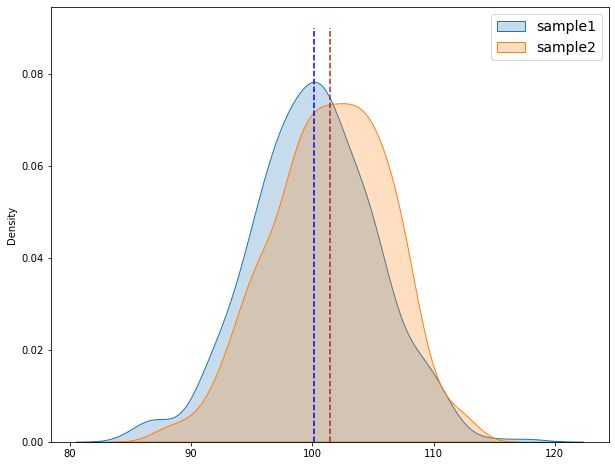

In [70]:
n = 500

sample1 = 5 * np.random.randn(n) + 100
sample2 = 5 * np.random.randn(n) + 101

plt.figure(figsize=(10,8))
sns.kdeplot(sample1, shade=True)
sns.kdeplot(sample2, shade=True)
plt.legend(['sample1', 'sample2'], fontsize=14)
plt.vlines(x=sample1.mean(), ymin=0, ymax= 0.09, color='blue', linestyles='--')
plt.vlines(x=sample2.mean(), ymin=0, ymax= 0.09, color='brown', linestyles='--')
plt.show()

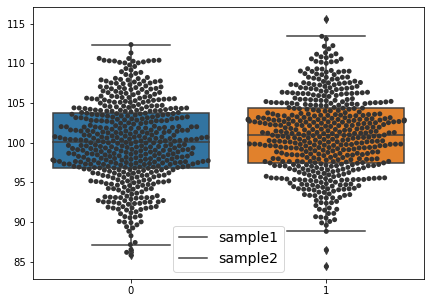

In [21]:
plt.figure(figsize=(7,5))
sns.boxplot(data=[sample1, sample2])
sns.swarmplot(data=[sample1, sample2], color='.2')
plt.legend(['sample1', 'sample2'], fontsize=14)
plt.show()

equal = no significant difference

In [20]:
# calculate the t test
alpha = 0.05
t_stat, df, cv, p = independent_ttest(sample1, sample2, alpha)
print(f"t: {t_stat} \n Degrees of freedom: {df} \n Critical value: {cv} \n p-value: {p} \n")

# interpret via critical value
if abs(t_stat) <= cv:
    print("Fail to reject the null hypothesis (H0: population means of sample1 and sample2 are equal)")
else:
    print("Reject the null hypothesis (H0: population means of sample1 and sample2 are equal)")

# interpret via p-value
if p > alpha:
    print("Fail to reject the null hypothesis (H0: population means of sample1 and sample2 are equal)")
else:
    print("Reject the null hypothesis (H0: population means of sample1 and sample2 are equal)")

t: -2.7415338526166546 
 Degrees of freedom: 998 
 Critical value: 1.6463818766348755 
 p-value: 0.006224619999940728 

Reject the null hypothesis (H0: population means of sample1 and sample2 are equal)
Reject the null hypothesis (H0: population means of sample1 and sample2 are equal)


# ANOVA for 2 variables

In [22]:
f, p = st.f_oneway(sample1, sample2)

print("The F-statistic obtained running ANOVA on the data groups: ", f)
print("The p-value of the ANOVA test: ", p)

if p > 0.05:
    print("\n ANOVA failed to reject the null hypothesis (H0: population means of sample1 and sample2 are equal)")
else:
    print("\n Reject the null hypothesis (H0: population means of sample1 and sample2 are equal)")

The F-statistic obtained running ANOVA on the data groups:  7.516007865043205
The p-value of the ANOVA test:  0.006224619999943279

 Reject the null hypothesis (H0: population means of sample1 and sample2 are equal)


# ANOVA for multiple variables

In [23]:
from itertools import combinations

def multi_anova(groups, alpha=0.05):
    """
    Two-way ANOVA between multiple groups
    groups: A dictionary object of trial groups
    """
    list_anova = list(combinations(list(groups.keys()),2))

    for comb in list_anova:
        _, p = st.f_oneway(groups[comb[0]], groups[comb[1]])

        if p>0.05:
            print("\n ANOVA failed to reject the null hypothesis (H0: population means of {} and {} are equal)".format(comb[0], comb[1]))
        else:
            print("\n Reject the null hypothesis (H0: population means of {} and {} are equal)".format(comb[0], comb[1]))
        

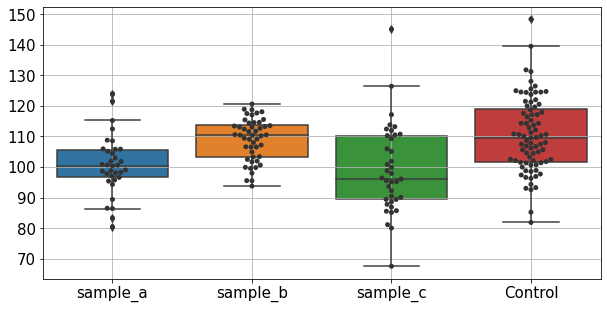

In [25]:
sample_a = 9*np.random.randn(34) + 101
sample_b = 6*np.random.randn(48) + 109
sample_c = 12*np.random.randn(38) + 103
Control = 10*np.random.randn(80) + 110

plt.figure(figsize=(10,5))
ax = sns.boxplot(data=[sample_a, sample_b, sample_c, Control])
ax = sns.swarmplot(data=[sample_a, sample_b, sample_c, Control], color='.2')
ax.set_xticklabels(['sample_a', 'sample_b', 'sample_c', 'Control'], fontsize=15)
ax.tick_params(axis="y", labelsize=15)
plt.grid(True)
plt.show()

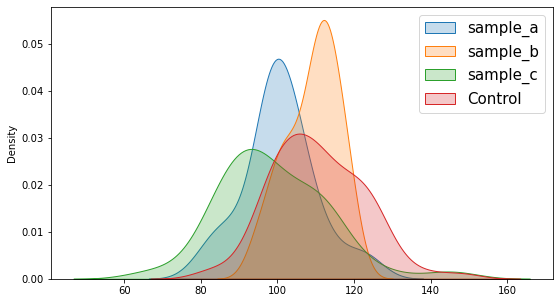

In [68]:
def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

coba = [sample_a, sample_b, sample_c, Control]

cmap = get_cmap(len(coba))

plt.figure(figsize=(9,5))
for i, el in enumerate(coba, 1):
    sns.kdeplot(el, shade=True)
plt.legend(['sample_a', 'sample_b', 'sample_c', 'Control'], fontsize=15)
plt.show()

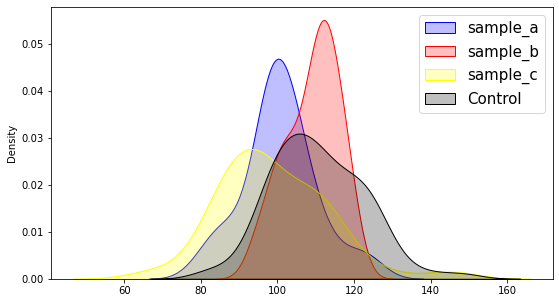

In [50]:
plt.figure(figsize=(9,5))
sns.kdeplot(sample_a, shade=True, color='Blue')
sns.kdeplot(sample_b, shade=True, color='Red')
sns.kdeplot(sample_c, shade=True, color='Yellow')
sns.kdeplot(Control, shade=True, color='Black')
plt.legend(['sample_a', 'sample_b', 'sample_c', 'Control'], fontsize=15)
plt.show()

In [27]:
groups = {'A': sample_a, 'B': sample_b, 'C': sample_c, 'Control': Control}

multi_anova(groups)


 Reject the null hypothesis (H0: population means of A and B are equal)

 ANOVA failed to reject the null hypothesis (H0: population means of A and C are equal)

 Reject the null hypothesis (H0: population means of A and Control are equal)

 Reject the null hypothesis (H0: population means of B and C are equal)

 ANOVA failed to reject the null hypothesis (H0: population means of B and Control are equal)

 Reject the null hypothesis (H0: population means of C and Control are equal)


In [28]:
list(combinations(list(groups.keys()),2))

[('A', 'B'),
 ('A', 'C'),
 ('A', 'Control'),
 ('B', 'C'),
 ('B', 'Control'),
 ('C', 'Control')]